In [17]:
import numpy as np
import matplotlib.pyplot as plt
from romshake.simulators.gauss import gauss
from romshake.simulators.svd_curve import SVDCurveSimulator
from romshake.simulators.analytic import AnalyticSimulator
from romshake.core.numerical_rom_builder import NumericalRomBuilder

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


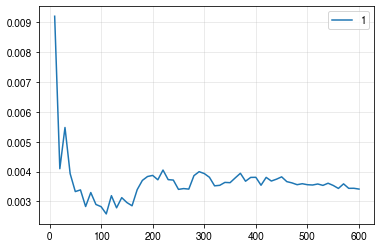

In [42]:
base_sim = AnalyticSimulator(gauss)
base_dict = {'t': np.linspace(0, 1, 100)}
test_dict = {'t': np.random.rand(50)}

rank = 1000
# pvals = [1, 2, 4, 6, 8]
pvals = [1]
for p in pvals:
    svdsim = SVDCurveSimulator(
        base_sim, test_dict, m=20, p=p, smin=-15, smax=0, fast=False)
    nrb = NumericalRomBuilder(
        'test', svdsim, 10, 10, 600, 'halton', {'t': (0, 1)}, 
        ranks=[rank], rbf_kernels=['thin_plate_spline'], clear=True)
    plt.plot(nrb.nsamples_history, nrb.error_history[rank]['thin_plate_spline'],
             label=p)
plt.legend()             
plt.show()
    
#     params, data = svdsim.evaluate(base_dict)
#     plt.plot(np.linalg.svd(data, full_matrices=False)[1])
#     plt.plot(svdsim.sv_curve)
# plt.yscale('log')
# plt.show()